### K Nearest Neighbours

In phishing detection, accurately identifying whether a URL or email is legitimate or fraudulent is critical for cybersecurity. Phishing attacks, which trick users into revealing sensitive information, are a prevalent threat in today’s digital landscape. Decision trees can effectively distinguish between legitimate and phishing samples based on predefined features. Their hierarchical structure, breaking down complex decisions into a series of simple yes/no splits, makes them valuable for this task.

Decision trees are particularly beneficial in phishing detection for several reasons:

- **Transparency**: They provide a clear, interpretable model, making it easy to understand why specific decisions are made.
- **Efficiency**: Decision trees can handle both numerical and categorical data, making them versatile for various types of phishing features.
- **Non-linearity**: Phishing datasets often have non-linear relationships, and decision trees can model these relationships without requiring transformations.


KNN Accuracy (k=5): 0.9996

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     10000
           1       1.00      1.00      1.00     10000

    accuracy                           1.00     20000
   macro avg       1.00      1.00      1.00     20000
weighted avg       1.00      1.00      1.00     20000



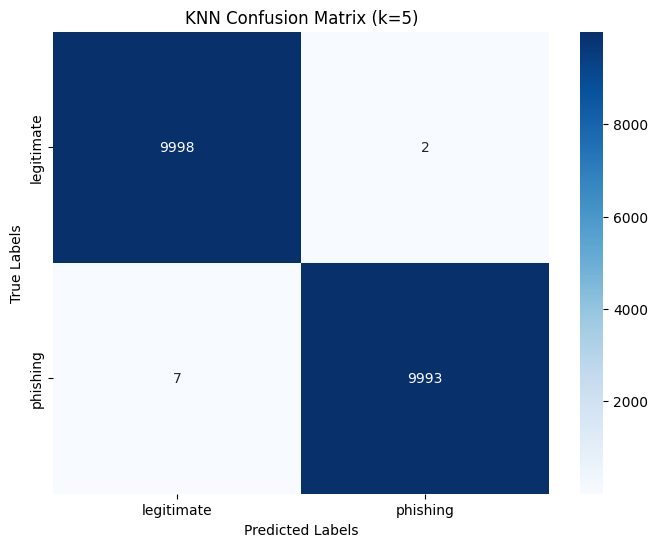

In [2]:
# Import necessary libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import os, sys
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV

# # Get the current working directory of the notebook
# current_dir = os.getcwd()

# # Add the project root directory to sys.path
# project_root = os.path.abspath(os.path.join(current_dir, '..'))
# sys.path.append(project_root)

folder_name = '../../data/preprocessed_phishing/knn/'

# Load preprocessed data
X_train_knn = pd.read_csv(os.path.join(folder_name, 'knn_X_train.csv'))
X_test_knn = pd.read_csv(os.path.join(folder_name, 'knn_X_test.csv'))
y_train_knn = pd.read_csv(os.path.join(folder_name, 'knn_y_train.csv')).values.ravel()
y_test_knn = pd.read_csv(os.path.join(folder_name, 'knn_y_test.csv')).values.ravel()

class_labels = ['legitimate', 'phishing']

# Initialize and train KNN model
k = 5  # Number of neighbors
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train_knn, y_train_knn)

# Predict on test set
y_pred_knn = knn.predict(X_test_knn)

# Evaluate performance
accuracy = accuracy_score(y_test_knn, y_pred_knn)
print(f"KNN Accuracy (k={k}): {accuracy:.4f}")
print("\nClassification Report:\n", classification_report(y_test_knn, y_pred_knn))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test_knn, y_pred_knn)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title(f"KNN Confusion Matrix (k={k})")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

Received a KNN Accuracy of 99% on the test set with 5 neighbours


# Tune parameters & k fold cross validation
**Since KNN does not build a model during training but uses the training data directly during predictions, it is a lazy learner. Cross-validation ensures that the model is evaluated on multiple subsets of the data, giving a better estimate of how well the model generalizes to unseen data. This avoids over-relying on a single train-test split, which might not represent the true performance.**



Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best Parameters: {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'uniform'}
Best Cross-Validation Accuracy: 0.9997999999999999
KNN Accuracy (Test Set): 0.9997

Classification Report:
               precision    recall  f1-score   support

  legitimate       1.00      1.00      1.00     10000
    phishing       1.00      1.00      1.00     10000

    accuracy                           1.00     20000
   macro avg       1.00      1.00      1.00     20000
weighted avg       1.00      1.00      1.00     20000



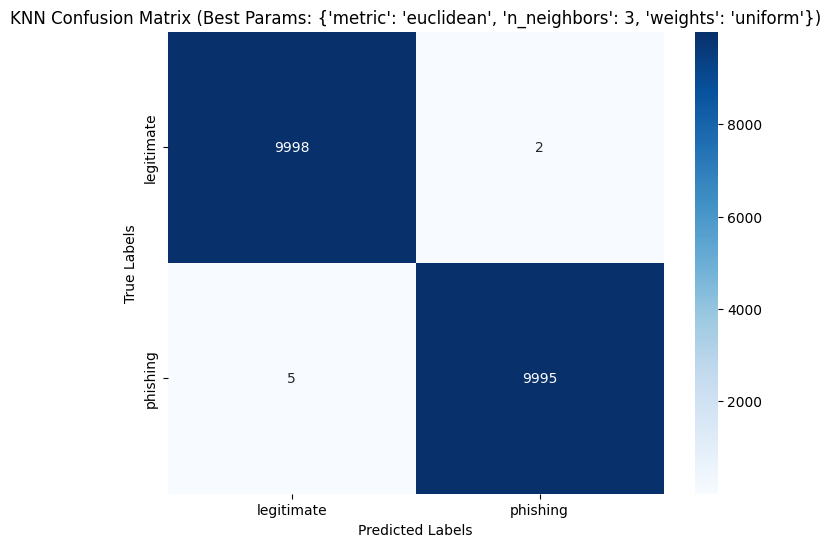

In [ ]:
# Tune the model and use 5 fold cross validation


# Define the KNN model
knn = KNeighborsClassifier()

# Define the parameter grid
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

# Perform GridSearchCV
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1)
grid_search.fit(X_train_knn, y_train_knn)

# Display the best parameters and accuracy
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Accuracy:", grid_search.best_score_)

# Train the KNN model with the best parameters
best_knn = grid_search.best_estimator_
best_knn.fit(X_train_knn, y_train_knn)

# Predict on test set
y_pred_knn = best_knn.predict(X_test_knn)

# Evaluate performance
accuracy = accuracy_score(y_test_knn, y_pred_knn)
print(f"KNN Accuracy (Test Set): {accuracy:.4f}")
print("\nClassification Report:\n", classification_report(y_test_knn, y_pred_knn, target_names=class_labels))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test_knn, y_pred_knn)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title(f"KNN Confusion Matrix (Best Params: {grid_search.best_params_})")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

Fitting 10 folds for each of 30 candidates, totalling 300 fits
Best Parameters: {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'uniform'}
Best Cross-Validation Accuracy: 0.9998125
KNN Accuracy (Test Set): 0.9997

Classification Report:
               precision    recall  f1-score   support

  legitimate       1.00      1.00      1.00     10000
    phishing       1.00      1.00      1.00     10000

    accuracy                           1.00     20000
   macro avg       1.00      1.00      1.00     20000
weighted avg       1.00      1.00      1.00     20000



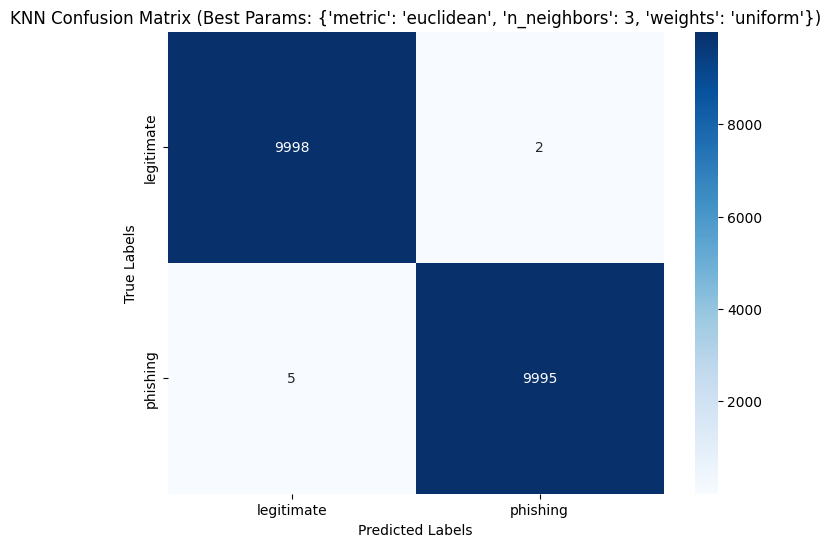

In [4]:
# 10 fold cross validation


# Define the KNN model
knn = KNeighborsClassifier()

# Define the parameter grid
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

# Perform GridSearchCV
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=10, scoring='accuracy', verbose=1)
grid_search.fit(X_train_knn, y_train_knn)

# Display the best parameters and accuracy
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Accuracy:", grid_search.best_score_)

# Train the KNN model with the best parameters
best_knn = grid_search.best_estimator_
best_knn.fit(X_train_knn, y_train_knn)

# Predict on test set
y_pred_knn = best_knn.predict(X_test_knn)

# Evaluate performance
accuracy = accuracy_score(y_test_knn, y_pred_knn)
print(f"KNN Accuracy (Test Set): {accuracy:.4f}")
print("\nClassification Report:\n", classification_report(y_test_knn, y_pred_knn, target_names=class_labels))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test_knn, y_pred_knn)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title(f"KNN Confusion Matrix (Best Params: {grid_search.best_params_})")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

**10 fold cross validation on KNN with the best params (3 number of neighbours)**
- We achieved a result of 99.97 on the test set